In [47]:
import pandas
import matplotlib.pyplot as plt
import ruptures as rpt 
import numpy as np
from tslearn.clustering import TimeSeriesKMeans

In [48]:
data=pandas.read_csv('PowerProduction.csv',header=0,encoding = "ISO-8859-1")

In [49]:
data.head()

,Unit1,Unit2,Unit3,Unit4,Timestamp,Total,weekday,monthday,month,Date,week_num
0,363.397546,0.313414,0.022739,42.953678,01-01-2017 00:00,406.687378,sö,1.0,jan,01-01-2017,1.0
1,364.341108,0.313414,0.022739,42.947920,01-01-2017 00:30,407.625181,sö,1.0,jan,01-01-2017,1.0
2,365.150132,0.313414,0.022739,42.893757,01-01-2017 01:00,408.380043,sö,1.0,jan,01-01-2017,1.0
3,365.208506,0.313414,0.022739,42.859928,01-01-2017 01:30,408.404587,sö,1.0,jan,01-01-2017,1.0
4,366.165311,0.313414,0.022739,43.121319,01-01-2017 02:00,409.622783,sö,1.0,jan,01-01-2017,1.0


In [65]:
data.fillna(0)

,Unit1,Unit2,Unit3,Unit4,Timestamp,Total,weekday,monthday,month,Date,week_num
0,363.397546,0.313414,0.022739,42.953678,01-01-2017 00:00,406.687378,sö,1.0,jan,01-01-2017,1.0
1,364.341108,0.313414,0.022739,42.947920,01-01-2017 00:30,407.625181,sö,1.0,jan,01-01-2017,1.0
2,365.150132,0.313414,0.022739,42.893757,01-01-2017 01:00,408.380043,sö,1.0,jan,01-01-2017,1.0
3,365.208506,0.313414,0.022739,42.859928,01-01-2017 01:30,408.404587,sö,1.0,jan,01-01-2017,1.0
4,366.165311,0.313414,0.022739,43.121319,01-01-2017 02:00,409.622783,sö,1.0,jan,01-01-2017,1.0
...,...,...,...,...,...,...,...,...,...,...,...
29179,328.719519,329.751845,35.805037,35.613041,31-08-2018 21:30,729.889441,fr,31.0,aug,31-08-2018,35.0
29180,242.775918,243.570697,21.899330,21.935366,31-08-2018 22:00,530.181311,fr,31.0,aug,31-08-2018,35.0
29181,254.899087,253.881393,0.000000,42.170126,31-08-2018 22:30,550.950606,fr,31.0,aug,31-08-2018,35.0
29182,256.081029,256.961708,0.000000,42.014523,31-08-2018 23:00,555.057259,fr,31.0,aug,31-08-2018,35.0


In [66]:
timestamp = data['Timestamp'].values
u1 = data['Unit1'].values
u2 = data['Unit2'].values
u3 = data['Unit3'].values
u4 = data['Unit4'].values
total = data['Total'].values
ndata = len(u1)
t = list(range(ndata))

In [67]:
data2 = data.drop(['Timestamp','weekday','month','Date'],axis=1)

In [68]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean",random_state=0).fit(total.reshape(-1, 1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

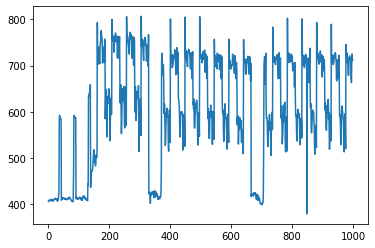

In [26]:
plt.plot(t[0:1000],total[0:1000])
plt.show()

Using Pelt algorithm with L2 regularization for detecting the change points in the time series.

In [14]:
algo = rpt.Pelt(model="l2").fit(total)
result = algo.predict(pen=200)  # 'pen' is for 'penalty'

5695

Period of the data is represented the total data divided by the number of change points.

In [19]:
ndata/len(result)

5.12449517120281

In [37]:
total=total-np.nanmean(total)

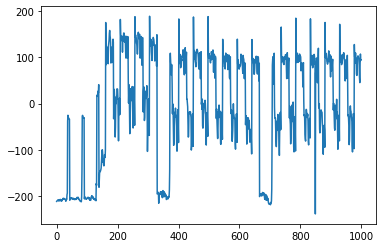

In [38]:
plt.plot(t[0:1000],total[0:1000])
plt.show()